# Import libraries

In [9]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 228.5 kB/s eta 0:00:00


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, concatenate, Dense, Flatten, Input
from keras.models import Model
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
%matplotlib inline


# Load data

In [2]:
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [4]:
movies.shape, ratings.shape

((9742, 3), (100836, 4))

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


# Data Visualization

In [17]:
genre = []
for gn in movies['genres']:
    gn_list = gn.split('|')
    for item in gn_list:
        if item not in genre:
            genre.append(item)
            
genres = str(genre)

movie_titles = []

for mv in movies.title:
    movie_titles.append(mv)
    
movie_titles = str(movie_titles)
    
        

## wordcloud

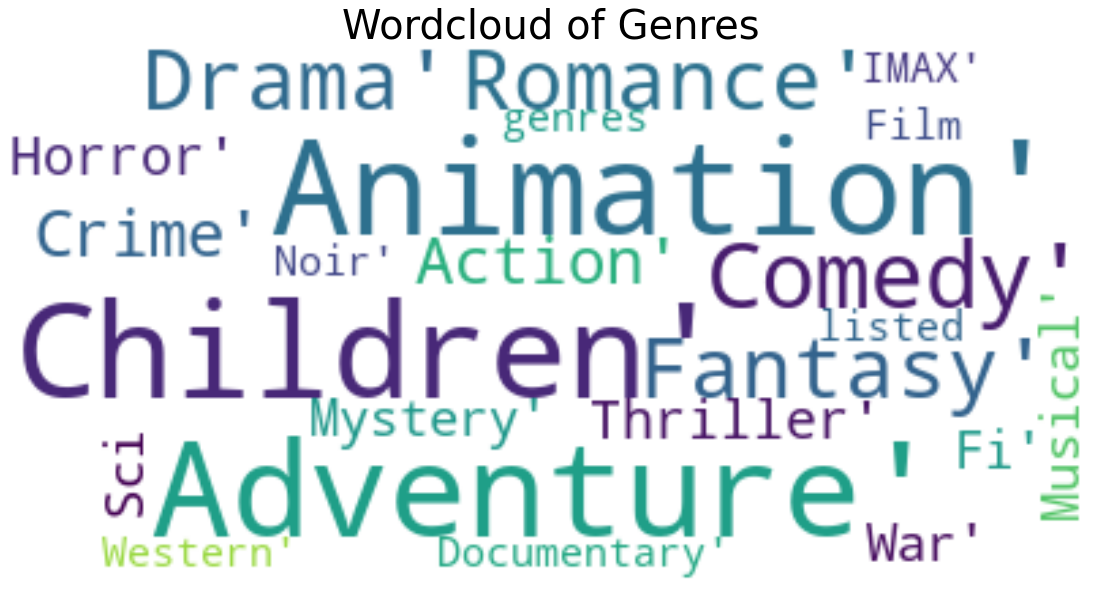

In [29]:
wordcloud_genres = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(genres)
plt.figure(figsize=(30,10))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Genres", fontsize=40)
plt.show()

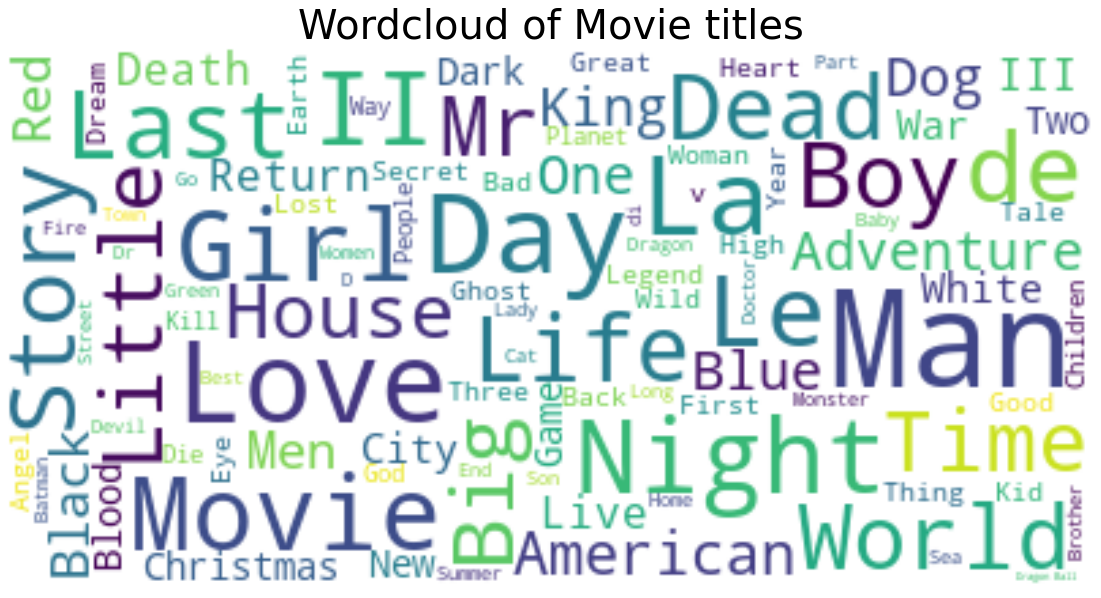

In [30]:
wordcloud_genres = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(movie_titles )
plt.figure(figsize=(30,10))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Movie titles", fontsize=40)
plt.show()

In [32]:
dataset = pd.merge(ratings,movies, how='left',on='movieId')
dataset.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [53]:
top_rated = dataset.groupby(['title'])[['rating']].sum().nlargest(15,'rating')
top_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1404.0
Forrest Gump (1994),1370.0
Pulp Fiction (1994),1288.5
"Matrix, The (1999)",1165.5
"Silence of the Lambs, The (1991)",1161.0


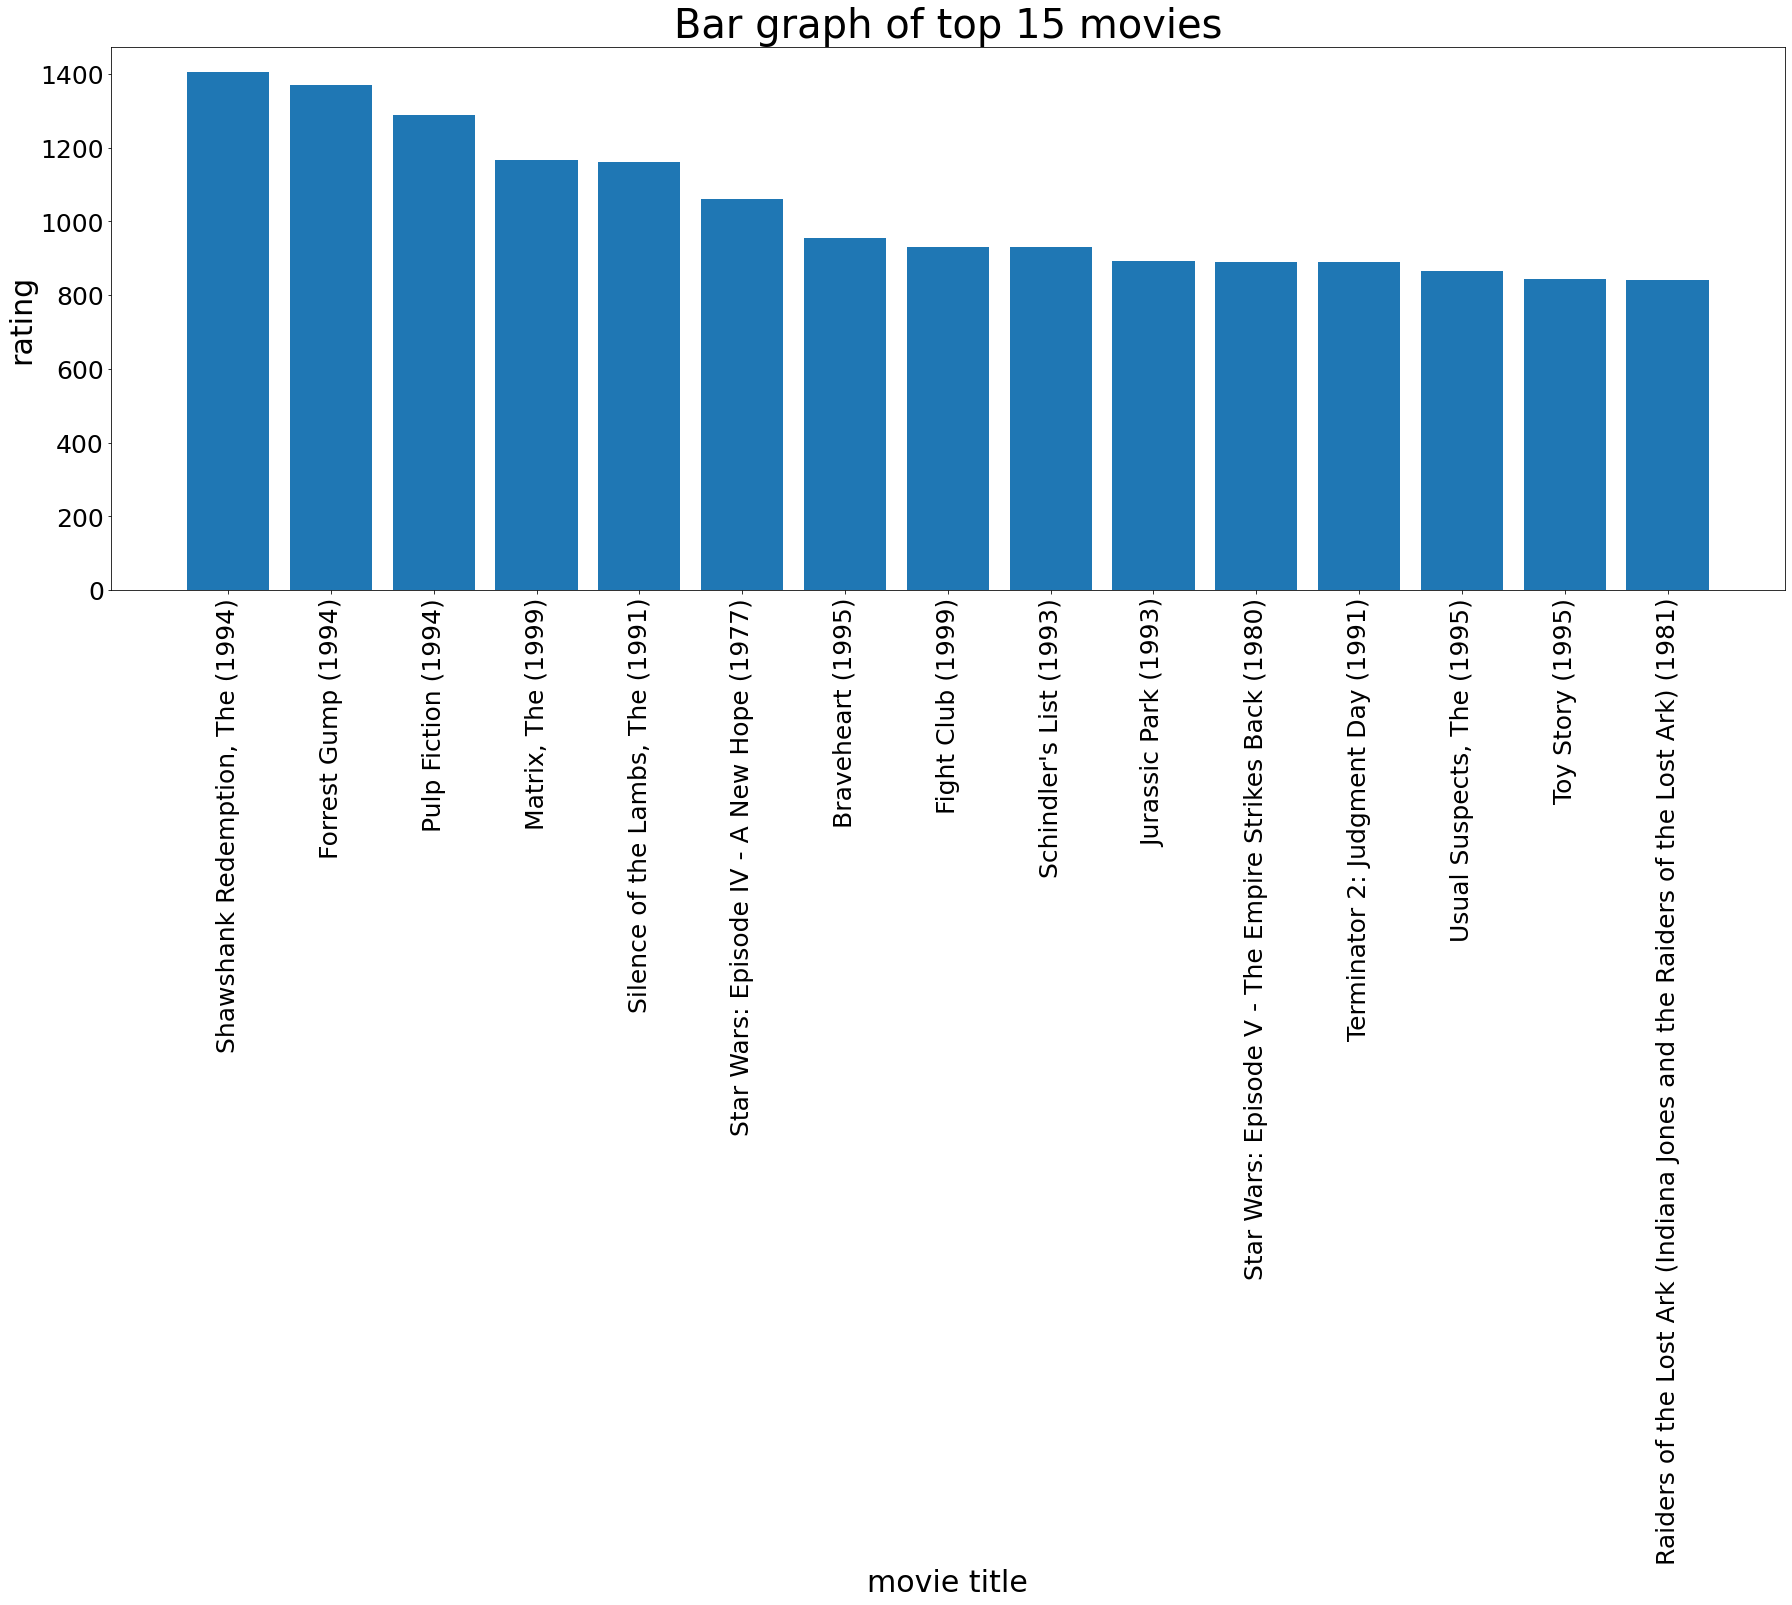

In [54]:
plt.figure(figsize=(30,10))
plt.title("Bar graph of top 15 movies", fontsize=40)
plt.xlabel('movie title', fontsize= 30)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.ylabel('rating', fontsize=30)
plt.bar(top_rated.index,top_rated['rating'],linewidth=3)
plt.show()